In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


__Part 1 ‑ Exploratory Data Analysis__

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [2]:
#import json 
logins = pd.read_json('logins.json')
logins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
logins.set_index('login_time', inplace=True)

In [4]:
logins['count'] = 1

In [5]:
log15m = logins.resample('15T').sum()

In [6]:
log15m.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
log15m.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


<AxesSubplot:ylabel='Count'>

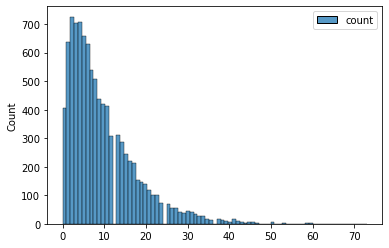

In [8]:

sns.histplot(log15m,)

In [9]:
#

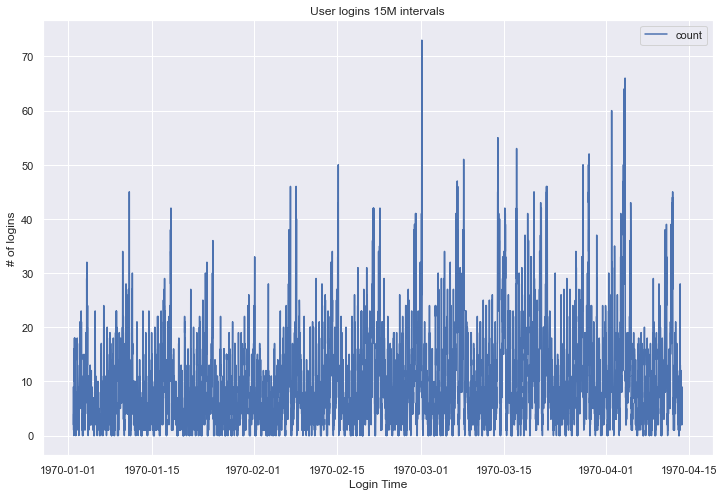

In [10]:
#plot # of logins over login_times
sns.set_theme(style='darkgrid')
_ = plt.figure(figsize=(12,8))
_ = sns.lineplot(data=log15m)
_ = plt.title('User logins 15M intervals')
_ = plt.xlabel('Login Time')
_ = plt.ylabel('# of logins')

In [11]:
#Doesnt tell us much, we see some spikes indicating higher logins, have to zoom in and look further.

In [12]:
#plot Daily and Hourly trends
log15m.reset_index(inplace=True)
log15m['Day'] = log15m.login_time.dt.day_name()
log15m['Hour'] = log15m.login_time.dt.hour
log15m.head()

,login_time,count,Day,Hour
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21


<AxesSubplot:title={'center':'Login count by day of week'}, xlabel='Day', ylabel='count'>

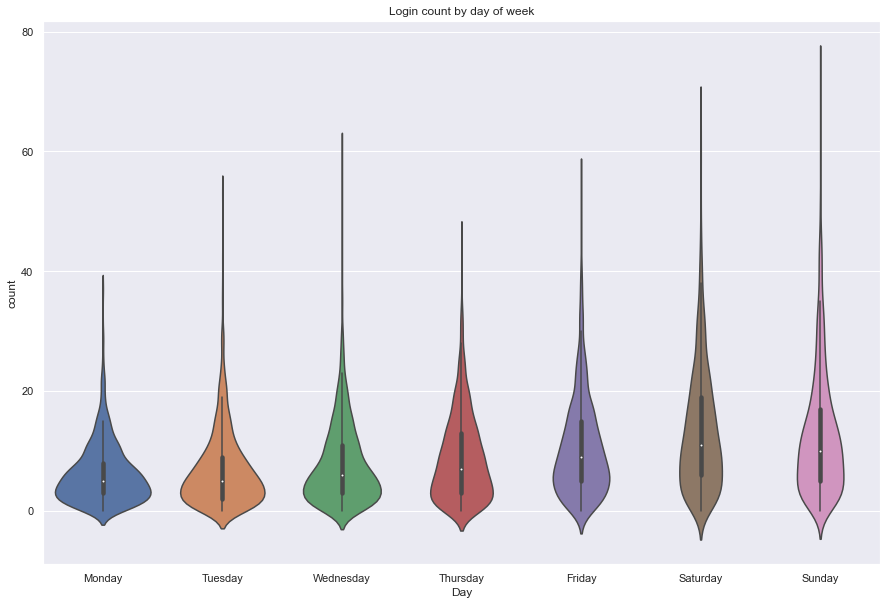

In [13]:
sns.set_theme(style='darkgrid')
_ = plt.figure(figsize=(15,10))
_ = plt.title('Login count by day of week')
sns.violinplot(x='Day',y='count',data=log15m, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], trim=True)

In [14]:
#Here we can see increasing trend mon-weds, then resurges Thurs-Sunday.  Strongest activity is on weekends.  

<AxesSubplot:title={'center':'Login count by Hour of day'}, xlabel='Hour', ylabel='count'>

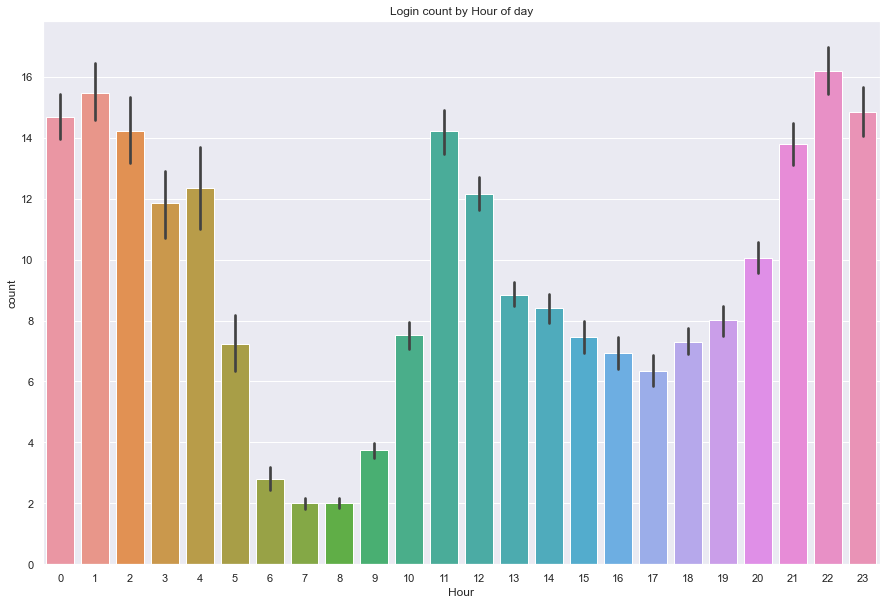

In [15]:
sns.set_theme(style='darkgrid')
_ = plt.figure(figsize=(15,10))
_ = plt.title('Login count by Hour of day')
sns.barplot(x='Hour',y='count',data=log15m, )

In [16]:
#Time of day has a cycling pattern with peaks approx 12 hours apart around 12pm and 12am hours time of day.

In [17]:
agg = log15m.groupby(['Day','Hour'], as_index=False).sum()

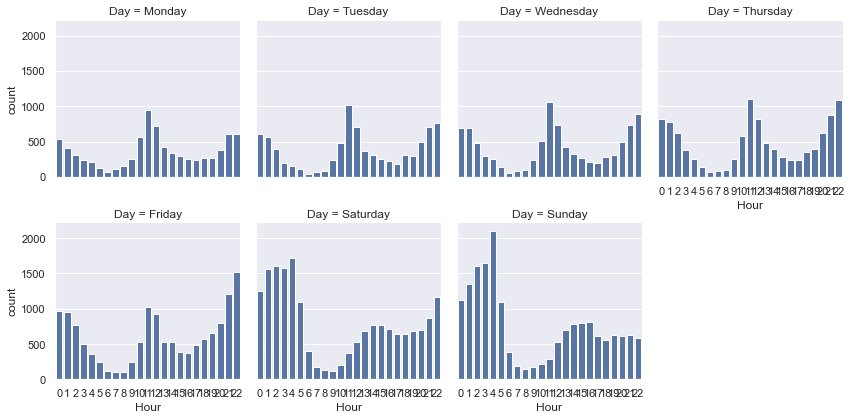

In [18]:

g = sns.FacetGrid(agg, col="Day", col_wrap=4, col_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
g.map(sns.barplot, "Hour", "count", order=range(0,23))

In [19]:
#Similar login patterns are prevalent throughout the weekday but starting Friday night into Sunday you can see it picks up into the night hours.

__Part 2 ‑ Experiment and metrics design__

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

    The Key measure of success would be seeing an increase in the rides relative to the drivers current activity.  If the reimbursement program works we would expect to see a general increase in rides with the additional portion mostly coming from increased trips across the bridge as the driver won't be penalized for seeking rides across the bridge.

2.Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.

Please provide details on:

a. how you will implement the experiment

    One way to test this is to randomly(within your driver population) select 2 groups of drivers to then test reimburse vs no-reimburse effectiveness.  

b. what statistical test(s) you will conduct to verify the significance of the observation

    We can perform a t-test and see if our hypothesis ("reimbursing drivers will increase their trips across the bridge") is statistically significant.  We'll use a 95% confidence interval as a threshhold.  


c. how you would interpret the results and provide recommendations to the city operations team along with any caveats

    If our reimbursement program can increase the trips across the bridge then we could try to roll out a pilot program to a group of drivers with the lowest cross bridge rides.  We also would need to monitor and make sure that the increased rides is translating to other metrics (customer satisaction, less wait times, revenue)  





__Part 3 ‑ Predictive modeling__
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account inJanuary 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.


1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

In [20]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
#check for null items
df.isnull().sum()


city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [23]:
#impute nulls with mean and fill phone with NULL as we cant avg iphone/android category
df.avg_rating_of_driver = df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean())
df.avg_rating_by_driver = df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean())
df.phone = df.phone.fillna(df.phone.mode().iloc[0]) #fill missing values for each column (using its own most frequent value)

In [24]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [25]:
#change the objects to datetimes
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [26]:
retained = df['last_trip_date'] >= '2014-06-01 00:00:00'

In [27]:
retained.value_counts(normalize=True)
#37.6% retained

False    0.62392
True     0.37608
Name: last_trip_date, dtype: float64

In [28]:

#find if user qualifies as active
df['active'] = df.last_trip_date >= '2014-06-01 00:00:00'
df.active.value_counts(normalize=True)

False    0.62392
True     0.37608
Name: active, dtype: float64

___EDA___

<AxesSubplot:>

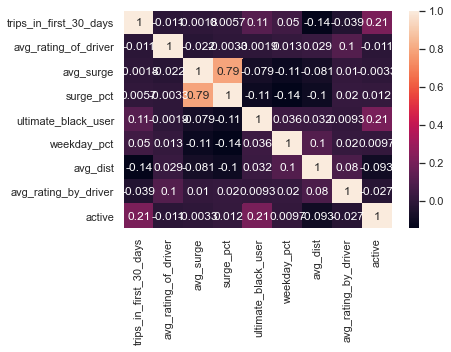

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  active                  50000 non-null  bool  

In [31]:
cats=df[['city', 'phone', ]]
nums = df[['trips_in_first_30_days',  'avg_rating_of_driver',
       'avg_surge',  'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver']]

<AxesSubplot:xlabel='city', ylabel='count'>

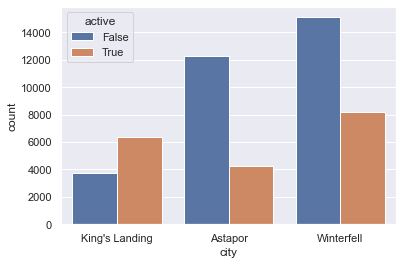

In [32]:
#check out categories based on active /non active users
sns.countplot(x='city', data=df, hue='active')

<AxesSubplot:xlabel='phone', ylabel='count'>

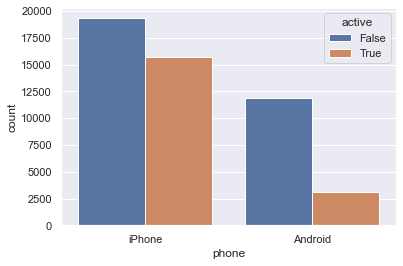

In [33]:
sns.countplot(x='phone', data=df, hue='active')

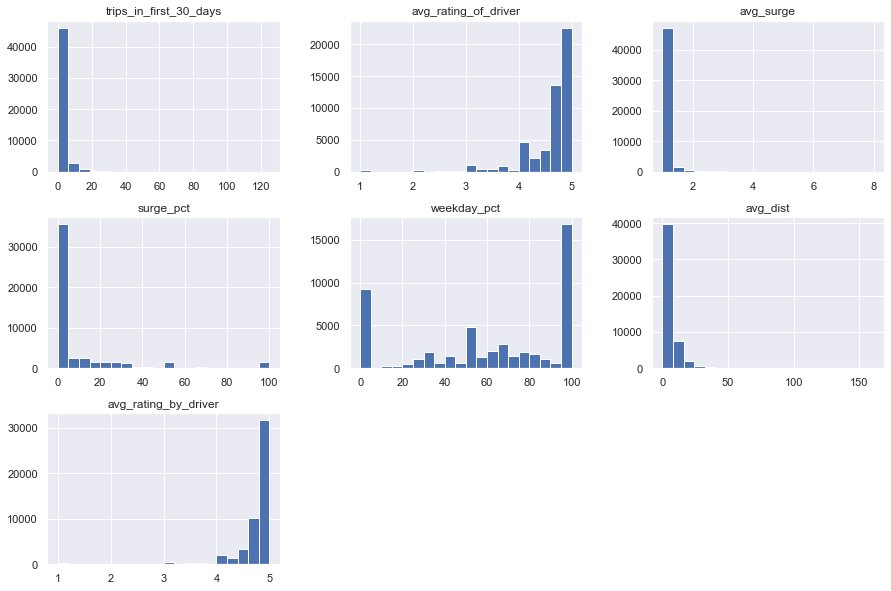

In [34]:
#check out numericals 
num_cols = ['trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver']
_ = df[num_cols].hist(bins=20,figsize=(15,10),)

In [35]:
# for regression would need to preprocess these distrbutions to be more normal and standardize them.

2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

In [36]:
from pycaret.classification import *

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report, confusion_matrix
import xgboost as xgb

In [37]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [38]:
dfr = df.replace(True,1)
dfr = df.replace(False,0)

In [39]:
y = dfr.active
X = dfr.drop(['active','signup_date','last_trip_date'], axis=1)
X = pd.get_dummies(X)

In [40]:
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1.0,46.2,3.67,5.0,0,1,0,0,1
1,0,5.0,1.00,0.0,0.0,50.0,8.26,5.0,1,0,0,1,0
2,3,4.3,1.00,0.0,0.0,100.0,0.77,5.0,1,0,0,0,1
3,9,4.6,1.14,20.0,1.0,80.0,2.36,4.9,0,1,0,0,1
4,14,4.4,1.19,11.8,0.0,82.4,3.13,4.9,0,0,1,1,0


In [41]:
#preprocessing.   get dummies


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,)

In [42]:
xgbcl = xgb.XGBClassifier(objective='binary:logistic',
                         tree_method='gpu_hist',
                      n_jobs = -1,random_state=123)

# Fit the classifier to the training set
xgbcl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [43]:
# Predict the labels of the test set: preds
y_pred = xgbcl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.784400


In [44]:
#print confusion matrix, classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6626 1084]
 [1611 3179]]
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83      7710
         1.0       0.75      0.66      0.70      4790

    accuracy                           0.78     12500
   macro avg       0.78      0.76      0.77     12500
weighted avg       0.78      0.78      0.78     12500



In [45]:
#get area under curve (AUC) 
dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"binary:logistic",
         'tree_method':'gpu_hist',
                         'n_jobs':-1}
#Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=dmatrix, params=params, 
                    nfold=10, num_boost_round=10, 
                    metrics="auc", as_pandas=True, seed=123,)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])


   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.826354       0.002068       0.822048      0.005899
1        0.838812       0.001134       0.834207      0.006035
2        0.844556       0.001423       0.839343      0.005374
3        0.848511       0.001141       0.842649      0.005666
4        0.851979       0.000898       0.845259      0.005905
5        0.854890       0.000629       0.847594      0.005560
6        0.856706       0.000651       0.848813      0.005629
7        0.858551       0.000785       0.850093      0.005490
8        0.860422       0.001002       0.851297      0.005133
9        0.861770       0.001060       0.851837      0.005003
0.8518366


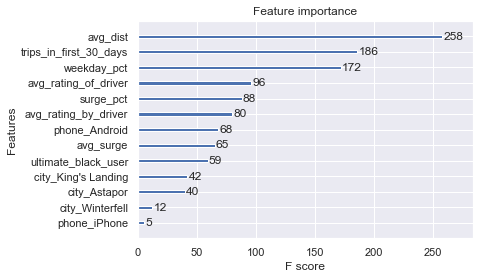

In [46]:
#What are the most important features in the dataset relating to fraud.  
dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"binary:logistic",
         'tree_method':'gpu_hist',
                         'n_jobs':-1}

# Train the model: 
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=20)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

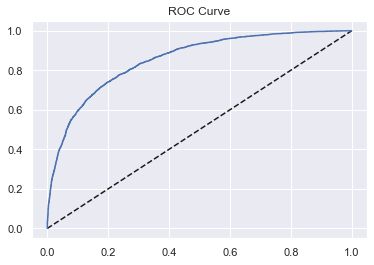

In [47]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
# Compute predicted probabilities: y_pred_prob
y_pred_prob = xgbcl.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.show()

In [ ]:
#Try Pycaret to Do some Modeling.

In [48]:
dfc = df.drop(['signup_date','last_trip_date'], axis=1)


In [49]:
dfc.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,False


In [51]:
clf = setup(data=dfc,
            target='active',
            use_gpu=True,
           )

,Description,Value
0,session_id,960
1,Target,active
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(50000, 11)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [52]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7911,0.8571,0.6673,0.7495,0.7059,0.5447,0.5471,10.9540
lightgbm,Light Gradient Boosting Machine,0.7887,0.8556,0.6679,0.7438,0.7037,0.5402,0.5422,3.3600
xgboost,Extreme Gradient Boosting,0.7873,0.8526,0.6634,0.7433,0.7010,0.5367,0.5389,1.3660
gbc,Gradient Boosting Classifier,0.7841,0.8493,0.6574,0.7395,0.6960,0.5295,0.5318,2.5280
ada,Ada Boost Classifier,0.7794,0.8419,0.6484,0.7338,0.6883,0.5186,0.5211,0.8100
rf,Random Forest Classifier,0.7556,0.8189,0.6566,0.6818,0.6688,0.4752,0.4756,2.7460
et,Extra Trees Classifier,0.7483,0.8000,0.6604,0.6670,0.6636,0.4625,0.4626,7.2620
knn,K Neighbors Classifier,0.7426,0.7830,0.6178,0.6716,0.6434,0.4426,0.4437,1.0300
nb,Naive Bayes,0.7228,0.7643,0.6532,0.6259,0.6391,0.4142,0.4146,0.0350
ridge,Ridge Classifier,0.7154,0.0000,0.4701,0.6744,0.5539,0.3546,0.3671,0.0360


In [54]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7926,0.8561,0.6649,0.7543,0.7068,0.5473,0.5499
1,0.7789,0.8422,0.6444,0.7348,0.6866,0.5169,0.5196
2,0.7849,0.8477,0.6884,0.7254,0.7064,0.5368,0.5373
3,0.7874,0.8510,0.6543,0.7487,0.6983,0.5353,0.5382
4,0.7914,0.8593,0.6793,0.7438,0.7101,0.5477,0.5491
5,0.7906,0.8596,0.6558,0.7550,0.7019,0.5417,0.5449
6,0.7851,0.8494,0.6702,0.7350,0.7011,0.5340,0.5353
7,0.7980,0.8618,0.6753,0.7603,0.7153,0.5596,0.5620
8,0.7746,0.8448,0.6350,0.7299,0.6791,0.5067,0.5096
9,0.7894,0.8540,0.6669,0.7457,0.7041,0.5414,0.5434


In [55]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7926,0.8609,0.6573,0.7588,0.7044,0.5459,0.5492
1,0.7811,0.8441,0.6444,0.7400,0.6889,0.5213,0.5243
2,0.7903,0.8533,0.6991,0.7313,0.7148,0.5491,0.5495
3,0.7871,0.8536,0.6581,0.7459,0.6992,0.5355,0.5380
4,0.8009,0.8670,0.6877,0.7599,0.7220,0.5674,0.5692
5,0.7920,0.8643,0.6573,0.7574,0.7038,0.5448,0.5480
6,0.7886,0.8522,0.6733,0.7408,0.7054,0.5411,0.5426
7,0.8014,0.8670,0.6837,0.7632,0.7212,0.5677,0.5698
8,0.7849,0.8514,0.6502,0.7448,0.6943,0.5295,0.5324
9,0.7917,0.8570,0.6624,0.7535,0.7050,0.5450,0.5477


In [59]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7826,0.8469,0.6550,0.7374,0.6938,0.5261,0.5283
1,0.7689,0.8337,0.6132,0.7290,0.6661,0.4914,0.4957
2,0.7757,0.8412,0.6748,0.7133,0.6935,0.5169,0.5173
3,0.7743,0.8338,0.6330,0.7307,0.6783,0.5059,0.5089
4,0.7894,0.8514,0.6664,0.7464,0.7041,0.5415,0.5436
5,0.7843,0.8444,0.6459,0.7463,0.6925,0.5277,0.5309
6,0.7797,0.8358,0.6596,0.7288,0.6925,0.5215,0.5231
7,0.7906,0.8548,0.6700,0.7466,0.7062,0.5442,0.5462
8,0.7703,0.8339,0.6228,0.7267,0.6708,0.4960,0.4994
9,0.7779,0.8435,0.6433,0.7331,0.6853,0.5149,0.5175


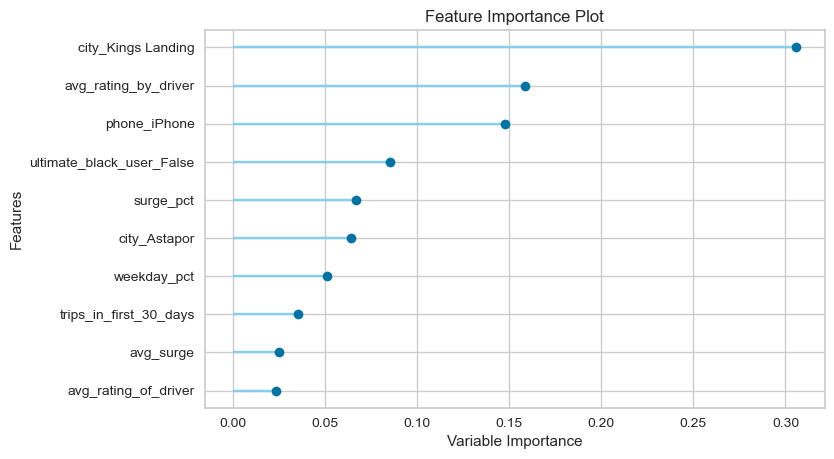

In [64]:
plot_model(xgb, plot = 'feature')

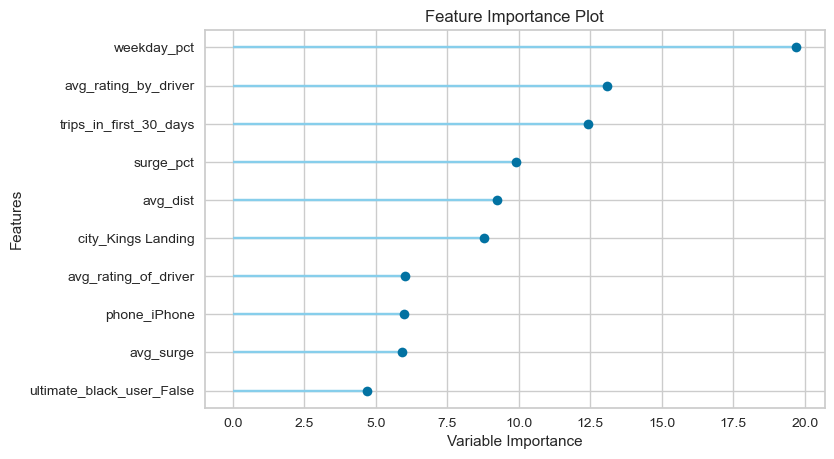

In [65]:
plot_model(cat, plot = 'feature')

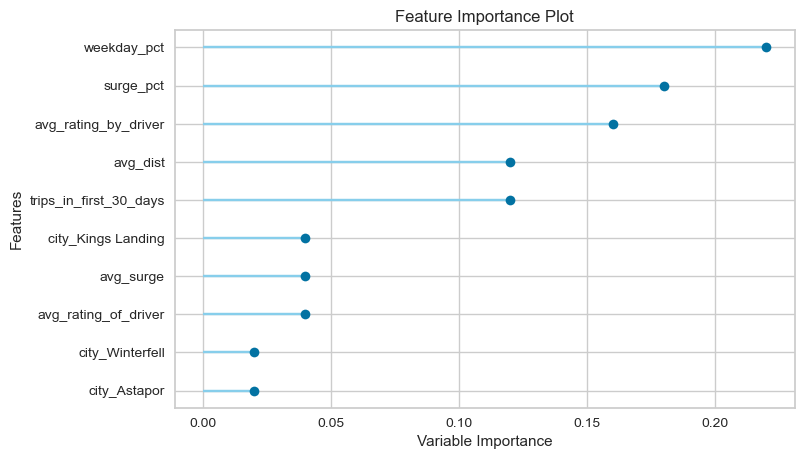

In [66]:
plot_model(ada, plot = 'feature')

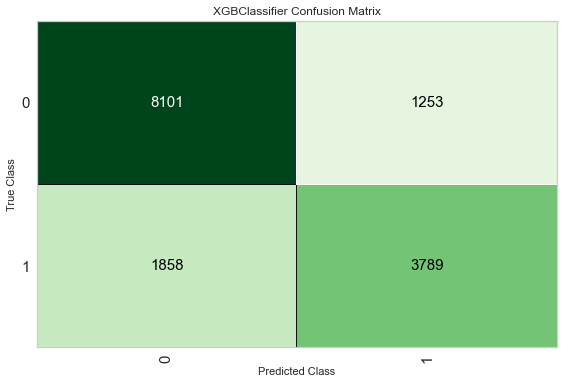

In [61]:
plot_model(xgb, plot = 'confusion_matrix')

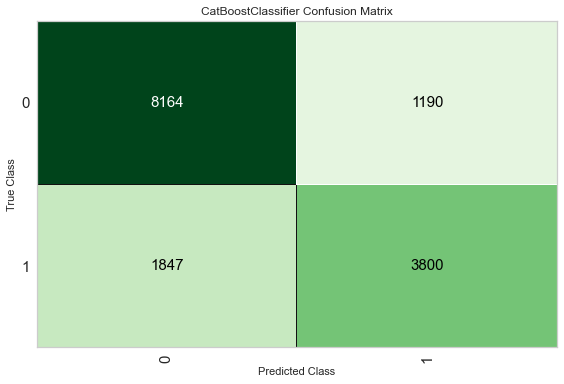

In [62]:
plot_model(cat, plot = 'confusion_matrix')

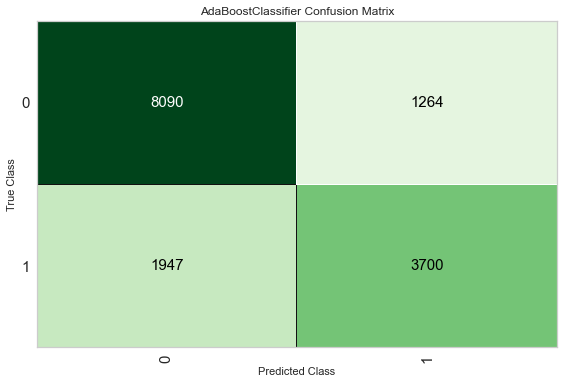

In [63]:
plot_model(ada, plot = 'confusion_matrix')

__3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).__

   Tree-based classifiers performed fairly well with this dataset.  XGBoost had the best performance.  Looking at the feature importance we see that
    avg_dist, weekday_pct, trips_in_first_30_days, avg_rating_by_driver standout. 
    
   A curious feature is that users in King's Landing have higher retention rates despite being the lowest in total rides.  It would be worth investigating this further.  
    
   Weekday_pct is a big indicator perhaps capturing the commute crowd, we could develop ways to increase these types of users as they tend to have higher retention.
    
   High usage in the first 30 days also indicates higher retention.  So incentivising users to interact as much with the app in those first 30 days could be key to growth/retention.
   
   Also, users who rate highly in the 'avg_rating_by_driver' indicates the driver had a pleasant experience with the user which increases chances of further usage.